**Notebook credit**: Based on the original D2L notebook [here](https://github.com/d2l-ai/d2l-en-colab/blob/master/chapter_appendix-mathematics-for-deep-learning/geometry-linear-algebraic-ops.ipynb).


General pre-lecture discussion: https://normaldeviate.wordpress.com/2012/06/12/statistics-versus-machine-learning-5-2/

# Geometry and Linear Algebraic Operations

Linear algebra is one of the key mathematical pillars
underlying much of the work that we do in deep learning
and in machine learning more broadly.

Here, we will go deeper,
highlighting some geometric interpretations of linear algebra operations,
and introducing a few fundamental concepts.

## Geometry of Vectors
First, we need to discuss the two common geometric interpretations of vectors,
as either points or directions in space.
Fundamentally, a vector is a list of numbers such as the Python list below.


In [ ]:
v = [1, 7, 0, 1] # A Python list, comments in Pythn begin with the hash sign

In [ ]:
print(v) # print() does exactly what it says!

[1, 7, 0, 1]


In [ ]:
u = [2, 8, 9, 3] # another list
print(u)

[2, 8, 9, 3]


In [ ]:
u + v # adding lists concatenates them; Python doesn't treat them as vectors

[2, 8, 9, 3, 1, 7, 0, 1]

In [ ]:
a = "here " # adding also concatenates strings
b = "and there"
print(a+b)

here and there


Mathematicians most often write this as either a *column* or *row* vector, which is to say either as

$$
\mathbf{x} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix},
$$

or

$$
\mathbf{x}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$

These often have different interpretations,
where data examples are column vectors
and weights used to form weighted sums are row vectors.
However, it can be beneficial to be flexible.
Though a single vector's default orientation is a column vector,
for any matrix representing a tabular dataset,
treating each data example as a row vector
in the matrix
is more conventional.

Given a vector, the first interpretation
that we should give it is as a point in space.
In two or three dimensions, we can visualize these points
by using the components of the vectors to define
the location of the points in space compared
to a fixed reference called the *origin*.  This can be seen in the figure below.

![An illustration of visualizing vectors as points in the plane.  The first component of the vector gives the $x$-coordinate, the second component gives the $y$-coordinate.  Higher dimensions are analogous, although much harder to visualize.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/grid-points.svg?raw=1)

This geometric point of view allows us to consider the problem on a more abstract level.
We can start considering tasks abstractly
as collections of points in space and picturing the task
as discovering how to separate two distinct clusters of points.

In parallel, there is a second point of view
that people often take of vectors: as directions in space.
Not only can we think of the vector $\mathbf{v} = [3,2]^\top$
as the location $3$ units to the right and $2$ units up from the origin,
we can also think of it as the direction itself
to take $3$ steps to the right and $2$ steps up.
In this way, we consider all the vectors in figure below the same.

![Any vector can be visualized as an arrow in the plane.  In this case, every vector drawn is a representation of the vector $(3,2)^\top$.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/par-vec.svg?raw=1)


One of the benefits of this shift is that
we can make visual sense of the act of vector addition.
In particular, we follow the directions given by one vector,
and then follow the directions given by the other, as is seen below.

![We can visualize vector addition by first following one vector, and then another.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/vec-add.svg?raw=1)


Vector subtraction has a similar interpretation.
By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction
that takes us from the point $\mathbf{v}$ to the point $\mathbf{u}$.


## Dot Products and Angles
If we take two column vectors $\mathbf{u}$ and $\mathbf{v}$,
we can form their dot product by computing:

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i.$$

Because the dot product is symmetric, we will mirror the notation
of classical multiplication and write

$$
\mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u},
$$

to highlight the fact that exchanging the order of the vectors will yield the same answer.

The dot product also admits a geometric interpretation: it is closely related to the angle between two vectors.  Consider the angle shown below.

![Between any two vectors in the plane there is a well defined angle $\theta$.  We will see this angle is intimately tied to the dot product.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/vec-angle.svg?raw=1)


To start, let us consider two specific vectors:

$$
\mathbf{v} = (r,0) \; \text{and} \; \mathbf{w} = (s\cos(\theta), s \sin(\theta)).
$$

The vector $\mathbf{v}$ is length $r$ and runs parallel to the $x$-axis,
and the vector $\mathbf{w}$ is of length $s$ and at angle $\theta$ with the $x$-axis.
If we compute the dot product of these two vectors, we see that

$$
\mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta).
$$

With some simple algebraic manipulation, we can rearrange terms to obtain

$$
\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$

In short, for these two specific vectors,
the dot product combined with the norms tell us the angle between the two vectors. This same fact is true in general. We will not derive the expression here, however,
if we consider writing $\|\mathbf{v} - \mathbf{w}\|^2$ in two ways:
one with the dot product, and the other geometrically using the law of cosines,
we can obtain the full relationship.
Indeed, for any two vectors $\mathbf{v}$ and $\mathbf{w}$,
the angle between the two vectors is

$$\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).$$

This is a nice result since nothing in the computation references two-dimensions.
Indeed, we can use this in three or three million dimensions without issue.

As a simple example, let us see how to compute the angle between a pair of vectors:


In [ ]:
%matplotlib inline
import numpy as np

def angle(v, w):
    return np.arccos(v.dot(w) / (np.sqrt(v.dot(v)) * np.sqrt(w.dot(w))))

angle(np.array([0, 1]), np.array([0, -1]))

3.141592653589793

In [ ]:
np.pi # the constant pi

3.141592653589793

In [ ]:
np.ones((1, 3)) # matrix consisting of 1s of a given shape

array([[1., 1., 1.]])

In [ ]:
u = np.array(u)

In [ ]:
v = np.array(v)

In [ ]:
print(u, v)

[2 8 9 3] [1 7 0 1]


In [ ]:
print(u+v) # now addition works like vector addition!

[ 3 15  9  4]


We will not use it right now, but it is useful to know
that we will refer to vectors for which the angle is $\pi/2$
(or equivalently $90^{\circ}$) as being *orthogonal*.
By examining the equation above, we see that this happens when $\theta = \pi/2$,
which is the same thing as $\cos(\theta) = 0$.
The only way this can happen is if the dot product itself is zero,
and two vectors are orthogonal if and only if $\mathbf{v}\cdot\mathbf{w} = 0$.
This will prove to be a helpful formula when understanding objects geometrically.

It is reasonable to ask: why is computing the angle useful?
The answer comes in the kind of invariance we expect data to have.
Consider an image, and a duplicate image,
where every pixel value is the same but $10\%$ the brightness.
The values of the individual pixels are in general far from the original values.
Thus, if one computed the distance between the original image and the darker one,
the distance can be large.
However, for most ML applications, the *content* is the same---it is still
an image of a cat as far as a cat/dog classifier is concerned.
However, if we consider the angle, it is not hard to see
that for any vector $\mathbf{v}$, the angle
between $\mathbf{v}$ and $0.1\cdot\mathbf{v}$ is zero.
This corresponds to the fact that scaling vectors
keeps the same direction and just changes the length.
The angle considers the darker image identical.

Examples like this are everywhere.
In text, we might want the topic being discussed
to not change if we write twice as long of document that says the same thing.
For some encoding (such as counting the number of occurrences of words in some vocabulary), this corresponds to a doubling of the vector encoding the document,
so again we can use the angle.

### Cosine Similarity
In ML contexts where the angle is employed
to measure the closeness of two vectors,
practitioners adopt the term *cosine similarity*
to refer to the portion
$$
\cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$
when the two vectors point in the same direction,
a minimum value of $-1$ when they point in opposite directions,
and a value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.


## Hyperplanes

In addition to working with vectors, another key object
that you must understand to go far in linear algebra
is the *hyperplane*, a generalization to higher dimensions
of a line (two dimensions) or of a plane (three dimensions).
In an $d$-dimensional vector space, a hyperplane has $d-1$ dimensions
and divides the space into two half-spaces.

Let us start with an example.
Suppose that we have a column vector $\mathbf{w}=[2,1]^\top$. We want to know, "what are the points $\mathbf{v}$ with $\mathbf{w}\cdot\mathbf{v} = 1$?"
By recalling the connection between dot products and angles above,
we can see that this is equivalent to
$$
\|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta) = 1 \; \iff \; \|\mathbf{v}\|\cos(\theta) = \frac{1}{\|\mathbf{w}\|} = \frac{1}{\sqrt{5}}.
$$

![Recalling trigonometry, we see the formula $\|\mathbf{v}\|\cos(\theta)$ is the length of the projection of the vector $\mathbf{v}$ onto the direction of $\mathbf{w}$](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/proj-vec.svg?raw=1)

If we consider the geometric meaning of this expression,
we see that this is equivalent to saying
that the length of the projection of $\mathbf{v}$
onto the direction of $\mathbf{w}$ is exactly $1/\|\mathbf{w}\|$, as is shown above.
The set of all points where this is true is a line
at right angles to the vector $\mathbf{w}$.
If we wanted, we could find the equation for this line
and see that it is $2x + y = 1$ or equivalently $y = 1 - 2x$.

If we now look at what happens when we ask about the set of points with
$\mathbf{w}\cdot\mathbf{v} > 1$ or $\mathbf{w}\cdot\mathbf{v} < 1$,
we can see that these are cases where the projections
are longer or shorter than $1/\|\mathbf{w}\|$, respectively.
Thus, those two inequalities define either side of the line.
In this way, we have found a way to cut our space into two halves,
where all the points on one side have dot product below a threshold,
and the other side above as we see below.

![If we now consider the inequality version of the expression, we see that our hyperplane (in this case: just a line) separates the space into two halves.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/space-division.svg?raw=1)

The story in higher dimension is much the same.
If we now take $\mathbf{w} = [1,2,3]^\top$
and ask about the points in three dimensions with $\mathbf{w}\cdot\mathbf{v} = 1$,
we obtain a plane at right angles to the given vector $\mathbf{w}$.
The two inequalities again define the two sides of the plane as is shown below.

![Hyperplanes in any dimension separate the space into two halves.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/space-division-3d.svg?raw=1)


While our ability to visualize runs out at this point,
nothing stops us from doing this in tens, hundreds, or billions of dimensions.
This occurs often when thinking about machine learned models.
For instance, we can understand linear classification models
as methods to find hyperplanes that separate the different target classes.
In this context, such hyperplanes are often referred to as *decision planes*.
The majority of deep learned classification models end
with a linear layer fed into a softmax,
so one can interpret the role of the deep neural network
to be to find a non-linear embedding such that the target classes
can be separated cleanly by hyperplanes.

To give a hand-built example, notice that we can produce a reasonable model
to classify tiny images of t-shirts and trousers from the Fashion MNIST dataset
(seen in :numref:`sec_fashion_mnist`)
by just taking the vector between their means to define the decision plane
and eyeball a crude threshold.  First we will load the data and compute the averages.


In [1]:
# Load in the dataset
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# keep only two classes each with 6,000 examples
X_train_0 = x_train[y_train == 0] # label id 0 is for T-shirt/top
X_train_1 = x_train[y_train == 1] # label id 1 is for Trouser
X_train_0.shape, X_train_1.shape

In [ ]:
# full test set has 10,000 images, we'll just keep the 2,000 that have labels 0 or 1
X_test = x_test[(y_test == 0) | (y_test == 1)]
Y_test = y_test[(y_test == 0) | (y_test == 1)]
X_test.shape, Y_test.shape

((2000, 28, 28), (2000,))

In [ ]:
# Compute averages
ave_0 = np.mean(X_train_0, axis=0)
ave_1 = np.mean(X_train_1, axis=0)

In [ ]:
ave_0.shape, ave_1.shape

((28, 28), (28, 28))

It can be informative to examine these averages in detail, so let us plot what they look like.  In this case, we see that the average indeed resembles a blurry image of a t-shirt.


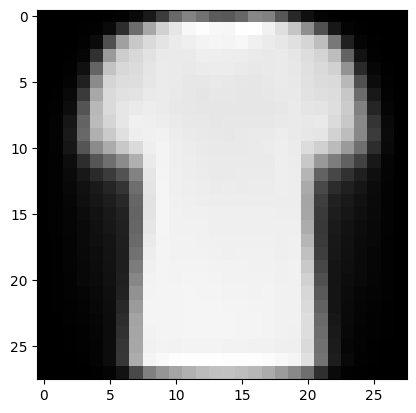

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm

my_cmap = matplotlib.cm.Greys.reversed()
# Plot average t-shirt
plt.imshow(ave_0.reshape(28, 28).tolist(), cmap=my_cmap)
plt.show()

In the second case, we again see that the average resembles a blurry image of trousers.


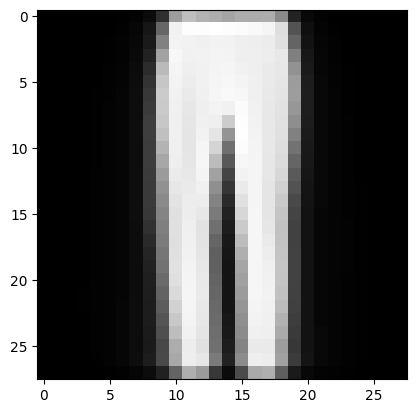

In [ ]:
# Plot average trousers
plt.imshow(ave_1.reshape(28, 28).tolist(), cmap=my_cmap)
plt.show()

In a fully machine learned solution, we would learn the threshold from the dataset.  In this case, we simply use a threshold that looked good on the training data by human trial and error.


In [ ]:
# Vector pointing from mean on one class to the mean of the other class
w = (ave_1 - ave_0).T

# Compute mean inner prodicts of images in the two classes with w
ip0 = X_train_0.reshape(6000, 28*28).dot(w.flatten()).mean()
ip1 = X_train_1.reshape(6000, 28*28).dot(w.flatten()).mean()
threshold = (ip0+ip1)/2
print(ip0, ip1, threshold)

-2081547.7085431388 -1237754.4727981945 -1659651.0906706667


In [ ]:
# Compute predictions and their accuracy on test set
predictions = X_test.reshape(2000, 28*28).dot(w.flatten()) > threshold
np.mean(1.0*predictions == Y_test)

0.8115

## Geometry of Linear Transformations

Through the above discussions,
we have a solid understanding of the geometry of vectors, lengths, and angles.
However, there is one important object we have omitted discussing,
and that is a geometric understanding of linear transformations represented by matrices.  Fully internalizing what matrices can do to transform data
between two potentially different high dimensional spaces takes significant practice,
and is beyond the scope of this notebook.
However, we can start building up intuition in two dimensions.

Suppose that we have some matrix:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\ c & d
\end{bmatrix}.
$$

If we want to apply this to an arbitrary vector
$\mathbf{v} = [x, y]^\top$,
we multiply and see that

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \\
& = \begin{bmatrix}ax+by\\ cx+dy\end{bmatrix} \\
& = x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\d\end{bmatrix} \\
& = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$

This may seem like an odd computation,
where something clear became somewhat impenetrable.
However, it tells us that we can write the way
that a matrix transforms *any* vector
in terms of how it transforms *two specific vectors*:
$[1,0]^\top$ and $[0,1]^\top$.
This is worth considering for a moment.
We have essentially reduced an infinite problem
(what happens to any pair of real numbers)
to a finite one (what happens to these specific vectors).
These vectors are an example a *basis*,
where we can write any vector in our space
as a weighted sum of these *basis vectors*.

Let us draw what happens when we use the specific matrix

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}.
$$

If we look at the specific vector $\mathbf{v} = [2, -1]^\top$,
we see this is $2\cdot[1,0]^\top + -1\cdot[0,1]^\top$,
and thus we know that the matrix $A$ will send this to
$2(\mathbf{A}[1,0]^\top) + -1(\mathbf{A}[0,1])^\top = 2[1, -1]^\top - [2,3]^\top = [0, -5]^\top$.
If we follow this logic through carefully,
say by considering the grid of all integer pairs of points,
we see that what happens is that the matrix multiplication
can skew, rotate, and scale the grid,
but the grid structure must remain as you see below.

![The matrix $\mathbf{A}$ acting on the given basis vectors.  Notice how the entire grid is transported along with it.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/grid-transform.svg?raw=1)


This is the most important intuitive point
to internalize about linear transformations represented by matrices.
Matrices are incapable of distorting some parts of space differently than others.
All they can do is take the original coordinates on our space
and skew, rotate, and scale them.

Some distortions can be severe.  For instance the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix},
$$

compresses the entire two-dimensional plane down to a single line.
Identifying and working with such transformations are the topic of a later section,
but geometrically we can see that this is fundamentally different
from the types of transformations we saw above.
For instance, the result from matrix $\mathbf{A}$ can be "bent back" to the original grid.  The results from matrix $\mathbf{B}$ cannot
because we will never know where the vector $[1,2]^\top$ came from---was
it $[1,1]^\top$ or $[0, -1]^\top$?

While this picture was for a $2\times2$ matrix,
nothing prevents us from taking the lessons learned into higher dimensions.
If we take similar basis vectors like $[1,0, \ldots,0]$
and see where our matrix sends them,
we can start to get a feeling for how the matrix multiplication
distorts the entire space in whatever dimension space we are dealing with.



## Linear Dependence

Consider again the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}.
$$

This compresses the entire plane down to live on the single line $y = 2x$.
The question now arises: is there some way we can detect this
just looking at the matrix itself?
The answer is that indeed we can.
Let us take $\mathbf{b}_1 = [2,4]^\top$ and $\mathbf{b}_2 = [-1, -2]^\top$
be the two columns of $\mathbf{B}$.
Remember that we can write everything transformed by the matrix $\mathbf{B}$
as a weighted sum of the columns of the matrix:
like $a_1\mathbf{b}_1 + a_2\mathbf{b}_2$.
We call this a *linear combination*.
The fact that $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$
means that we can write any linear combination of those two columns
entirely in terms of say $\mathbf{b}_2$ since

$$
a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2.
$$

This means that one of the columns is, in a sense, redundant
because it does not define a unique direction in space.
This should not surprise us too much
since we already saw that this matrix
collapses the entire plane down into a single line.
Moreover, we see that the linear dependence
$\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ captures this.
To make this more symmetrical between the two vectors, we will write this as

$$
\mathbf{b}_1  + 2\cdot\mathbf{b}_2 = 0.
$$

In general, we will say that a collection of vectors
$\mathbf{v}_1, \ldots, \mathbf{v}_k$ are *linearly dependent*
if there exist coefficients $a_1, \ldots, a_k$ *not all equal to zero* so that

$$
\sum_{i=1}^k a_i\mathbf{v_i} = 0.
$$

In this case, we can solve for one of the vectors
in terms of some combination of the others,
and effectively render it redundant.
Thus, a linear dependence in the columns of a matrix
is a witness to the fact that our matrix
is compressing the space down to some lower dimension.
If there is no linear dependence we say the vectors are *linearly independent*.
If the columns of a matrix are linearly independent,
no compression occurs and the operation can be undone.



## Rank

If we have a general $n\times m$ matrix,
it is reasonable to ask what dimension space the matrix maps into.
A concept known as the *rank* will be our answer.
In the previous section, we noted that a linear dependence
bears witness to compression of space into a lower dimension
and so we will be able to use this to define the notion of rank.
In particular, the rank of a matrix $\mathbf{A}$
is the largest number of linearly independent columns
amongst all subsets of columns. For example, the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix},
$$

has $\mathrm{rank}(B)=1$, since the two columns are linearly dependent,
but either column by itself is not linearly dependent.


In [ ]:
B = np.array(
    [[ 2,  4],
     [-1, -2]]
)
np.linalg.matrix_rank(B)

1


For a more challenging example, we can consider

$$
\mathbf{C} = \begin{bmatrix}
1& 3 & 0 & -1 & 0 \\
-1 & 0 & 1 & 1 & -1 \\
0 & 3 & 1 & 0 & -1 \\
2 & 3 & -1 & -2 & 1
\end{bmatrix},
$$

and show that $\mathbf{C}$ has rank two since, for instance,
the first two columns are linearly independent,
however any of the four collections of three columns are dependent.

This procedure, as described, is very inefficient.
It requires looking at every subset of the columns of our given matrix,
and thus is potentially exponential in the number of columns.
Later we will see a more computationally efficient way
to compute the rank of a matrix, but for now,
this is sufficient to see that the concept
is well defined and understand the meaning.


In [ ]:
C = np.array(
    [
     [ 1,  3,  0, -1,  0],
     [-1,  0,  1,  1, -1],
     [ 0,  3,  1,  0, -1],
     [ 2,  3, -1, -2,  1]
    ]
)
np.linalg.matrix_rank(C)

2


## Invertibility

We have seen above that multiplication by a matrix with linearly dependent columns
cannot be undone, i.e., there is no inverse operation that can always recover the input.  However, multiplication by a full-rank matrix
(i.e., some $\mathbf{A}$ that is $n \times n$ matrix with rank $n$),
we should always be able to undo it.  Consider the matrix

$$
\mathbf{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}.
$$

which is the matrix with ones along the diagonal, and zeros elsewhere.
We call this the *identity* matrix.
It is the matrix which leaves our data unchanged when applied.
To find a matrix which undoes what our matrix $\mathbf{A}$ has done,
we want to find a matrix $\mathbf{A}^{-1}$ such that

$$
\mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} =  \mathbf{I}.
$$

If we look at this as a system, we have $n \times n$ unknowns
(the entries of $\mathbf{A}^{-1}$) and $n \times n$ equations
(the equality that needs to hold between every entry of the product $\mathbf{A}^{-1}\mathbf{A}$ and every entry of $\mathbf{I}$)
so we should generically expect a solution to exist.
Indeed, in the next section we will see a quantity called the *determinant*,
which has the property that as long as the determinant is not zero, we can find a solution.  We call such a matrix $\mathbf{A}^{-1}$ the *inverse* matrix.
As an example, if $\mathbf{A}$ is the general $2 \times 2$ matrix

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

then we can see that the inverse is

$$
 \frac{1}{ad-bc}  \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}.
$$

We can test to see this by seeing that multiplying
by the inverse given by the formula above works in practice.


In [ ]:
def two_by_two_inv(M):
  a, b, c, d = M.flatten()
  inv = np.array([
      [ d, -b],
      [-c,  a]
  ])
  inv = inv / (a*d - b*c)
  return inv

M = np.array([[1, 2], [1, 4]])
M_inv = two_by_two_inv(M)
M_inv.dot(M)

array([[1., 0.],
       [0., 1.]])


## Summary
* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle to arbitrarily high-dimensional spaces.
* Hyperplanes are high-dimensional generalizations of lines and planes.  They can be used to define decision planes that are often used as the last step in a classification task.
* Matrix multiplication can be geometrically interpreted as uniform distortions of the underlying coordinates. They represent a very restricted, but mathematically clean, way to transform vectors.
* Linear dependence is a way to tell when a collection of vectors are in a lower dimensional space than we would expect (say you have $3$ vectors living in a $2$-dimensional space). The rank of a matrix is the size of the largest subset of its columns that are linearly independent.
* When a matrix's inverse is defined, matrix inversion allows us to find another matrix that undoes the action of the first.
